
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>
## <font color=red> Please don't rename this .ipynb file.</font><br>
- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

##LOAD DATA

In [2]:
X = np.load('./data/train_X.npy')
Y = np.array([np.load('./data/train_y.npy')]).T

Normalization / Standardization

In [3]:
def normalize(X):
    """
    Implement Normalization for input image features

    Args:
    X : numpy array of shape (n_samples, 784)

    Returns:
    X_norm : numpy array of shape (n_samples, 784) after normalization
    """
    X_norm = None

    ## TODO
    stddevs = np.std(X, axis=0)
    stddevs[stddevs==0] = 1
    X_norm = (X - np.mean(X, axis=0))/stddevs
    ## END TODO

    assert X_norm.shape == X.shape

    return X_norm

def scaling(X):
    """
    Implement MinMax Scaling on input image features

    Args:
    X : numpy array of shape (n_samples, 784)

    Returns:
    X_scaled : numpy array of shape (n_samples, 784)
    """
    X_scaled = None

    ##TODO
    maxmin = np.max(X,axis=0) - np.min(X,axis=0)
    maxmin[maxmin==0] = 1
    X_scaled = ((X - np.min(X,axis=0))/maxmin)
    ##END TODO

    assert X_scaled.shape == X.shape

    return X_scaled

### Split data into train/val

In [4]:
def split_data(X, Y, train_ratio=0.8):
    '''
    Split data into train and validation sets
    The first floor(train_ratio*n_sample) samples form the train set
    and the remaining the test set

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''
    # Try Normalization and scaling and store it in X_transformed
    X_transformed = X

    ## TODO
    X_transformed = scaling(normalize(X))
    ## END TODO

    assert X_transformed.shape == X.shape

    num_samples = len(X)
    indices = np.arange(num_samples)
    num_train_samples = math.floor(num_samples * train_ratio)
    train_indices = np.random.choice(indices, num_train_samples, replace=False)
    val_indices = list(set(indices) - set(train_indices))
    X_train, Y_train, X_val, Y_val = X_transformed[train_indices], Y[train_indices], X_transformed[val_indices], Y[val_indices]
  
    return X_train, Y_train, X_val, Y_val

**Plotting image**

In [5]:
def plot_image(x, y, idx):
    """
    Plot the given feature vector into image of size 28 X 28 
    note that originally the image was of size 28*28 which is flattened or unrolled
    to 784 X 1 feature vector

    Args:
    x : numpy array of images
    y : numpy array of ground truth labels for images
    idx : index of the image
    """

    image = np.reshape(x[idx], (28,28))
    plt.imshow(image, interpolation='nearest')
    plt.show()
    print (f'The ground truth label for this iamge is : {y[idx]}')

Encode 1 for any one of the class and 0 to all other remaining class for all labels

In [6]:
def get_data_for_class(X,Y,id):
    """
    Args:
    X : numpy array of input features, shape - (n_samples x 784)
    Y : numpy array of input targets, shape - (n_samples x 1)
    id : class id (one of 1,4,7,9)

    Returns:
    class_X : numpy array of input features, shape - (n_samples x 784)
    class_Y : numpy array of input targets, where class_Y[i]=1 if Y[i]=id else class_Y[i]=0, shape - (n_samples x 784)
    """
    class_X, class_Y = None, None

    ##TODO
    class_X = X
    class_Y = (Y==id).astype(int)
    ##END TODO

    assert class_X.shape == X.shape and class_Y.shape == Y.shape

    return class_X, class_Y

Random Sampling

In [7]:
def sample_training_points(X, y, sample_size):
    """
    Takes input features, targets and sample size, and returns random sample of size = sample_size

    Args: 
    X : numpy array of shape (n_samples , n_features)
    y : numpy array of shape (n_samples , 1)

    Returns: 
    sampled_X : numpy array of shape (sample_size , n_eatures)
    sampled_y : numpy array of shape (sample_size , 1)

    """
    sampled_X , sampled_y = None, None

    ##TODO
    n_samples = len(X)
    sample_indices = np.random.choice(n_samples, sample_size, replace=False)
    
    sampled_X = X[sample_indices]
    sampled_y = y[sample_indices]
    ##END TODO

    assert sampled_X.shape==(sample_size,X.shape[1]) and sampled_y.shape==(sample_size,1)

    return sampled_X, sampled_y

LOGISTIC REGRESSION CLASSIFIER

In [8]:
def sigmoid(weights, bias, X):
    """
    Implement logistic/ sigmoid function

    Args:
    weights : numpy array of shape (n_dimension , 1)
    bias : scaler
    X : numpy array of shape (n_samples , n_dimension)

    Returns: 
    Y_sigmoid : numpy array of shape (n_samples, 1)
    """
    Y_sigmoid = None

    ##TODO
    Y_sigmoid = 1/(1 + np.exp(-(X @ weights + bias)))
    ##END TODO
    assert Y_sigmoid.shape == (X.shape[0],1)

    return Y_sigmoid


def cross_entropy_loss(weights, bias, X, y):
    """
    Takes input features, weights, bias and target 
    and calculates binary cross entropy loss between y and predicted values of y.

    Args:
    weights : numpy array of shape (n_features, 1)
    bias : scalar
    X : numpy array of shape (n_samples, 1)
    y : numpy array of shape (n_samples, 1)

    Returns :
    loss : single float value
    """
    loss = 0.0

    ##TODO
    sigmoid_values = sigmoid(weights, bias, X)
    loss = -1 * np.mean(y*np.log(sigmoid_values) + (1-y)*np.log(1-sigmoid_values))
    ##END TODO

    return loss
  
def grad(X, y, weights, bias):
    """
    Return gradient for weights and biases

    Args:
    X : numpy array of shape (n_samples , n_dimension)
    y : numpy array of shape (n_samples , 1)
    weights : numpy array of shape (n_dimension , 1)
    bias : scalar

    Returns: 
    gradient : [dw , db]
              dw - numpy array of shape (n_dimension , 1)
              db - numpy array of shape (1)
    """

    dw , db = None , None

    ##TODO
    n_samples = X.shape[0]
    n_dimension = X.shape[1]
    X_e = np.c_[X,np.ones(n_samples)]
    gradval = -1 * np.mean((y - sigmoid(weights, bias, X)) * X_e, axis=0)
    dw = gradval[:n_dimension].reshape(n_dimension, 1)
    db = gradval[n_dimension].reshape(1,)
    ##END TODO

    assert dw.shape == weights.shape 

    gradient = [dw , db]

    return gradient

def logistic_regression(X, y, epoch, lr, sample_size):
    """
    Args :

    X : numpy array of inpuy features of shape (n_samples, n_features)
    y : numpy array of targets of shape (n_samples, 1)
    epochs : number of iterations of training
    lr : learning_rate
    sample_size : batch_size for each iteration

    Returns : 
    loss : list containg loss for each epoch
    weights : numpy array of shape (n_features, 1)
    bias :  scaler
    """

    loss, weights, bias = [], None, 0
    #define weights and bias (w, b) initialize the weight

    ##TODO
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    n_samples = X.shape[0]
    n_features = X.shape[1]
    for ep in range(epoch):
        X_b, y_b = sample_training_points(X, y, sample_size)
        gradient = grad(X_b, y_b, weights, bias)
        dw = gradient[0]
        db = float(gradient[1][0])
        weights -= lr*dw
        bias -= lr*db
        loss += [cross_entropy_loss(weights, bias, X, y)]
    ##TODO
    assert len(loss) == epoch and weights.shape == (X.shape[1],1)

    return [loss, weights, bias]

def train_multi_class(X, Y):
    """
    make multi class classifier using binary classification (1 vs all)

    Args:
    X : numpy array of input features of shape (n_samples, n_features)
    Y : numpy array of input features of shape (n_samples, 1)

    Returns:

    param_list : list of param for all classifiers, where param = [weights, bias]
    loss_list : list of lists of losses of all classifiers for all epochs
    """

    digits = [1,4,7,9]
    param_list = []
    loss_list = []


    #train i vs all weights and bias, where i in {1,4,7,9}
    epochs , lr , sample_size = 1200, 0.01, 200

    for i in digits:
        X_train, Y_train = get_data_for_class(X, Y, id=i)
        output = logistic_regression(X_train, Y_train, epochs, lr, sample_size)
        param_list.append(output[1:]) 
        loss_list.append(output[0])   

    return param_list, loss_list

In [9]:
def to_class(predicts):
    """
    Args: 
    predicts : numpy array of shape (n_samples, 4)

    Return:
    predicted classes : numpy array of shape(num_samples, class_id), where class_id in {1,4,7,9}

    """
    labels = {0:1, 1:4, 2:7, 3:9}
    predicted_class = []
    for i in range(predicts.shape[0]):
        label = np.argmax(predicts[i])
        predicted_class.append(labels[label])

    return np.array(predicted_class).reshape(len(predicted_class),1)

def prediction(param, X):
    """
    It return the array of predicted class for all samples in X                                    

    Args: 
    param[0] = [w,b] of class 1 vs all
    param[1] = [w,b] of class 4 vs all
    param[2] = [w,b] of class 7 vs all
    param[3] = [w,b] of class 9 vs all

    X = numpy array of input features, shape (n_samples , 784)

    Returns:
    predicts = numpy array for shape (n_samples , 4), 
             where predicts[i][j] is probablity that sample i belongs to class j when using classifer j vs all

    """

    predicts = None

    ##TODO
    predicts = np.column_stack([sigmoid(param[i][0], param[i][1], X) for i in range(4)])
    ##END TODO
    assert predicts.shape == (X.shape[0],4)

    return predicts


In [10]:
def accuracy(Y_pred, Y_true):

    '''
    This functions calculates accuracy for -
    1) each of the 4 class 
    2) whole dataset
    Note : Do not report in percentage

    Args:
    Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
    Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

    Returns:
    list of length 5, 1 st value is overall accuracy followed by accuracy of all 4 individual classifies
    '''

    total_accuracy = np.sum(Y_pred==Y_true)/Y_true.shape[0]
    accuracy_1 , accuracy_4 , accuracy_7 , accuracy_9 = 0, 0, 0, 0
    #TODO
    accuracy_1 = np.sum((Y_true==1)==(Y_pred==1))/Y_true.shape[0]
    accuracy_4 = np.sum((Y_true==4)==(Y_pred==4))/Y_true.shape[0]
    accuracy_7 = np.sum((Y_true==7)==(Y_pred==7))/Y_true.shape[0]
    accuracy_9 = np.sum((Y_true==9)==(Y_pred==9))/Y_true.shape[0]
    ##END TO

    print("Total Accuray : ", total_accuracy) 
    print("Accuray class 1 : ", accuracy_1) 
    print("Accuray class 4 : ", accuracy_4) 
    print("Accuray class 7 : ", accuracy_7) 
    print("Accuray class 9 : ", accuracy_9) 

    return [total_accuracy, accuracy_1, accuracy_4, accuracy_7, accuracy_9]

In [11]:
def calculate_metrics(Y_pred, Y_true):

    '''
    This functions calculates precision, recall and f1-score for -
    1) each of the 4 class 
    2) whole dataset
    Note : Do not report in percentage

    Args:
    Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
    Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

    Returns:
    (precision , recall , f1_score) : a tuple of 3 lists i.e. precison, recall and f1_score where
          precision : list of length 5, 1 st value is overall precison followed by precision of all 4 individual classes
          recall : list of length 5, 1 st value is overall recall followed by recall of all 4 individual classes
          f1_score : list of length 5, 1 st value is overall f1-score followed by f1-score of all 4 individual classes
    '''

    precision , recall , f1_score = [], [] ,[]

    ## TODO
    ## We use micro averaging to calculate the total F1 Score
    precision += [0]
    recall += [0]
    f1_score += [0]
    counts = []
    total_tp, total_fp, total_fn = 0, 0 ,0
    for c in [1,4,7,9]:
        TP = np.sum(Y_true[Y_true==Y_pred]==c)
        FP = np.sum(Y_pred[Y_true!=Y_pred]==c)
        FN = np.sum(Y_true[Y_true!=Y_pred]==c)
        counts += [np.sum(Y_true==c)]

        recall += [TP/(TP+FN)]
        precision += [TP/(TP+FP)]
        f1_score += [2*recall[-1]*precision[-1]/(recall[-1] + precision[-1])]
    
    recall[0] = np.sum(np.array(recall[1:])*np.array(counts))/Y_true.shape[0]
    precision[0] = np.sum(np.array(precision[1:])*np.array(counts))/Y_true.shape[0]
    f1_score[0] = np.sum(np.array(f1_score[1:])*np.array(counts))/Y_true.shape[0]
    ## END TODO

    assert len(precision)==5 and len(recall)==5 and len(f1_score)==5

    return (precision, recall, f1_score)

In [12]:
def plot_training_loss(loss_list):
    labels = ["1", "4", "7", "9"]
    for ids, loss in enumerate(loss_list):
        plt.plot(loss, label = labels[ids])
    plt.legend(loc='best')
    plt.title('Training Loss of each class (1 vs all)')
    plt.show()

In [13]:
X_train, Y_train, X_val, Y_val = split_data(X,Y)
param_lists, loss_list = train_multi_class(X_train, Y_train)

## Plot curve for loss

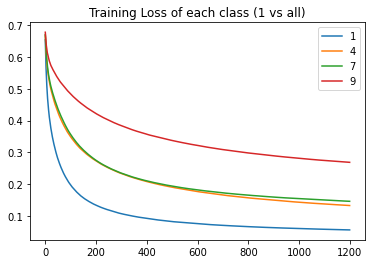

In [14]:
plot_training_loss(loss_list)

## Calculate accuracy, precision , recall and F1-score

In [15]:
Y_pred = to_class( prediction(param_lists, X_val) )

In [16]:
accuracy(Y_pred, Y_val)

Total Accuray :  0.9325
Accuray class 1 :  0.9925
Accuray class 4 :  0.975
Accuray class 7 :  0.95
Accuray class 9 :  0.9475


[0.9325, 0.9925, 0.975, 0.95, 0.9475]

In [17]:
precision, recall, f1_score = calculate_metrics(Y_pred, Y_val)